In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import copy
import scipy as sp
Data = pd.read_csv("network_backup_dataset.csv")
labels = Data.columns
for i, v in enumerate(labels):
    print "labels[" + str(i) + "] => " + v

def convert_OneDimension(label, data):
    
    if label == labels[1]:
        days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        for day, number in zip(days, range(len(days))):
            data = data.replace({'Day of Week': {day : number}})
        return data
    
    elif label == labels[3]:
        work_flow_ids = ['work_flow_0', 'work_flow_1','work_flow_2','work_flow_3', 'work_flow_4']
        for work_flow, number in zip(work_flow_ids, range(len(work_flow_ids))):
            data = data.replace({'Work-Flow-ID' : {work_flow : number}})
        return data
    
    elif label == labels[4]:
        uniqueFiles = ['File_{0}'.format(s) for s in range(len((pd.unique(Data['File Name']))))]
        for file_name, number in zip(uniqueFiles,range(len(uniqueFiles))):
            data = data.replace({'File Name' : {file_name : number}})
        return data      
    else:
        return data

for i in range(len(labels)):
    Data = convert_OneDimension(labels[i], Data)

labels[0] => Week #
labels[1] => Day of Week
labels[2] => Backup Start Time - Hour of Day
labels[3] => Work-Flow-ID
labels[4] => File Name
labels[5] => Size of Backup (GB)
labels[6] => Backup Time (hour)


The Activation Function: relu
The number of nuerons:  5
test_rmse: 0.107571289602


The Activation Function: relu
The number of nuerons:  10
test_rmse: 0.107571289602


The Activation Function: relu
The number of nuerons:  20
test_rmse: 0.102182849679


The Activation Function: relu
The number of nuerons:  50
test_rmse: 0.087729400963


The Activation Function: relu
The number of nuerons:  100
test_rmse: 0.076593231706




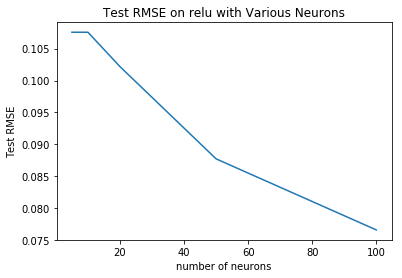

The Activation Function: logistic
The number of nuerons:  5
test_rmse: 0.109308423917


The Activation Function: logistic
The number of nuerons:  10
test_rmse: 0.103230906329


The Activation Function: logistic
The number of nuerons:  20
test_rmse: 0.101919151563


The Activation Function: logistic
The number of nuerons:  50
test_rmse: 0.0967724573614


The Activation Function: logistic
The number of nuerons:  100
test_rmse: 0.102969892242




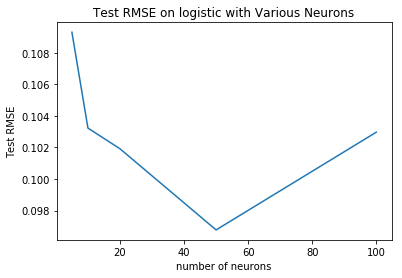

The Activation Function: tanh
The number of nuerons:  5
test_rmse: 0.111018380154


The Activation Function: tanh
The number of nuerons:  10
test_rmse: 0.106313102581


The Activation Function: tanh
The number of nuerons:  20
test_rmse: 0.0959345848172


The Activation Function: tanh
The number of nuerons:  50
test_rmse: 0.087422116653


The Activation Function: tanh
The number of nuerons:  100
test_rmse: 0.0907450325127




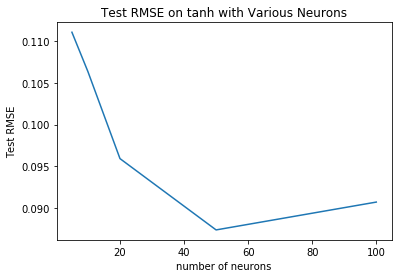

In [101]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
enc = OneHotEncoder()
feature_data = Data.iloc[:, 0:5]
feature_data_OneHotEncode = enc.fit_transform(feature_data).toarray()
target_data = Data[labels[5]]

binary_target_data = map(lambda x: int(x > 0.0), target_data)
binary_target_data = np.asarray(binary_target_data)
num_neurons = [5,10,20,50,100]
activation_function = ['relu', 'logistic', 'tanh']

for af in activation_function:
    test_rmse_list = []
    for i in num_neurons:
        clf = MLPClassifier(activation= af, solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(i,), random_state=1)
        clf.fit(feature_data_OneHotEncode, binary_target_data)
        kf = KFold(n_splits=10)

        #train_mse_list = []
        test_mse_list = []
        for train_index, test_index in kf.split(feature_data_OneHotEncode):

            #train_sample = feature_data_OneHotEncode[train_index]
            #train_target = binary_target_data[train_index]
            #train_predicted = clf.predict(train_sample)
            #train_mse = mean_squared_error(train_target, train_predicted)
            #train_mse_list.append(train_mse)
            
            test_sample = feature_data_OneHotEncode[test_index]
            test_target = binary_target_data[test_index]
            test_predicted = clf.predict(test_sample)
            test_mse = mean_squared_error(test_target, test_predicted)
            test_mse_list.append(test_mse)

        #avg_train_rmse = np.sqrt(np.sum(train_mse) / 10) 
        avg_test_rmse = np.sqrt(np.sum(test_mse) / 10) 

        #test_sample = feature_data_OneHotEncode[test_index]
        print 'The Activation Function:', af
        print 'The number of nuerons: ', i
        #print 'train_rmse: ', avg_train_rmse
        print 'test_rmse:',   avg_test_rmse
        print '\n'
        test_rmse_list.append(avg_test_rmse)
    plt.plot(num_neurons, test_rmse_list)
    plt.xlabel('number of neurons')
    plt.ylabel('Test RMSE')
    plt.title('Test RMSE on '+af+' with Various Neurons' )
    plt.show()